<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/02_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 02:Data Cleaning **

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [15]:
# Download the dataset
!wget -q https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/main/data/Telco-Customer-Churn.csv

# Load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

print("✅ Dataset loaded successfully!")
print("\n=== Data set overview ===")
print(f"Dataset shape: {df.shape}")  # (rows, columns)

✅ Dataset loaded successfully!

=== Data set overview ===
Dataset shape: (7043, 21)


In [16]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates() if df.duplicated().sum() > 0 else df

Duplicate rows: 0


In [17]:
# First look at the data
print("==== FIRST 5 ROWS ====\n")
display(df.head())

==== FIRST 5 ROWS ====



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
#Fix Total Charges

#Converting to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#checking how many become NaN
df['TotalCharges'].isna().sum()

np.int64(11)

In [19]:
#Handling Missing TotalCharges

#Dropping raws where total charge is NaN
df = df.dropna(subset=['TotalCharges'])
print(f"Dataset shape(new): {df.shape}")

Dataset shape(new): (7032, 21)


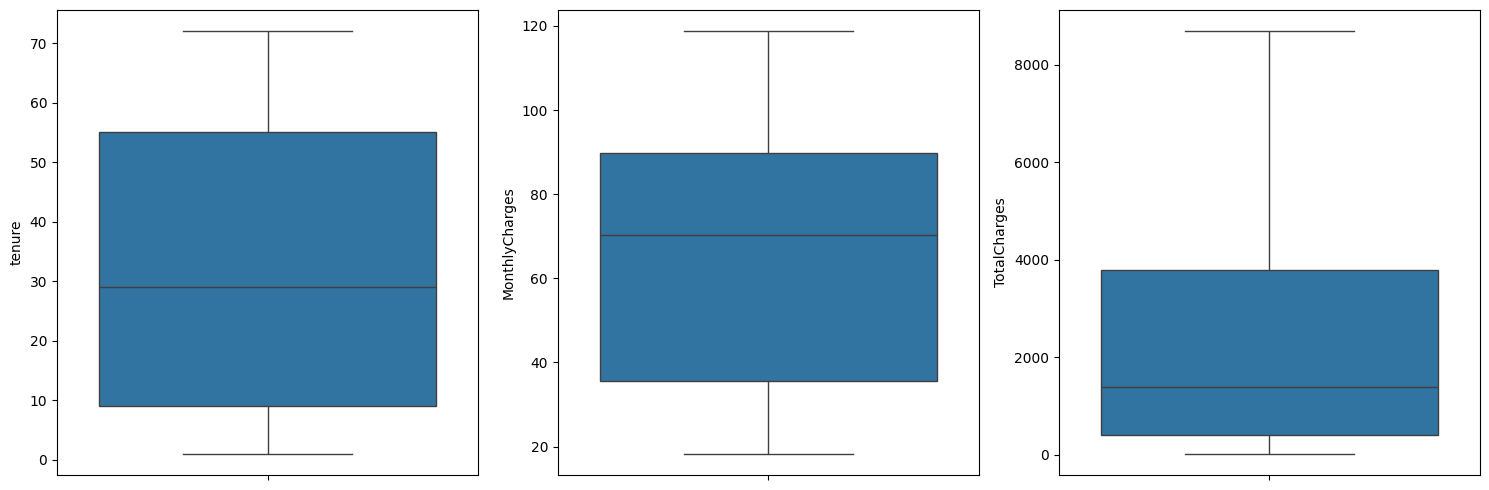

No major outliers — no removal needed.


In [27]:
# Outlier detection
# Boxplots for outliers
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(y=df['tenure'], ax=axes[0])
sns.boxplot(y=df['MonthlyCharges'], ax=axes[1])
sns.boxplot(y=df['TotalCharges'], ax=axes[2])
plt.tight_layout()
plt.show()
print("No major outliers — no removal needed.")

In [20]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [21]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6293,7977-HXJKU,Male,0,No,Yes,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,397.00,No
485,7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
6717,3768-NLUBH,Male,1,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,100.60,5746.15,Yes
5047,8149-AIQCG,Male,0,No,No,39,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.15,2730.85,No
6216,7162-WPHPM,Male,0,Yes,Yes,58,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),71.60,4230.25,No
5255,8486-AYEQH,Female,0,No,No,31,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.05,2227.80,No
177,2070-FNEXE,Female,1,No,No,7,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),76.45,503.60,Yes
249,0959-WHOKV,Male,0,No,No,42,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,One year,Yes,Electronic check,99.00,4298.45,No
3698,7346-MEDWM,Female,0,No,No,59,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,83.25,4949.10,No
286,3808-HFKDE,Female,0,No,No,20,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.35,927.15,No


In [22]:
#Converting churn to numeric(0/1)

df['Churn'] = df['Churn'].map({'No': 0,'Yes': 1})
df['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [23]:
# Dropping CustomerID (as it's not useful for modeling)

df = df.drop(columns=['customerID'])
print("✅ Dropped customerID! Columns now:", df.columns.tolist())
print("\n=== Updated Data set overview ===")
print(f"Dataset shape: {df.shape}")
df.head()

✅ Dropped customerID! Columns now: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

=== Updated Data set overview ===
Dataset shape: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [24]:
# Converting Yes/No Columns To 0/1

# 1) Finding yes/no columns
binary_cols = [col for col in df.columns
               if df[col].nunique() == 2 and
               sorted(df[col].unique().tolist()) == ['No','Yes']]

print(binary_cols)

#2) converting them to 0/1
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1,'No': 0})

df.head(10)

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [28]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
print("All binary columns encoded to 0/1!")

All binary columns encoded to 0/1!


In [25]:
#Quick Check for Missing Values
print("Missing values left:\n", df.isnull().sum())

Missing values left:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [26]:
# Saving Clean DataSet

cleaned_file = 'Cleaned_Telco_Customer_Churn.csv'
df.to_csv(cleaned_file, index=False)
print("✅ Cleaned dataset saved successfully as", cleaned_file,"!")


✅ Cleaned dataset saved successfully as Cleaned_Telco_Customer_Churn.csv !


# Cleaning Summary

*   The raw dataset contained 7043 customer entries and 21 features. During preprocessing, the TotalCharges variable was identified to contain 11 non-numeric values which were converted to NaN and subsequently removed, resulting in a final dataset of 7032 valid entries.**[Converted Total charges to numeric and remove(dropped) 11 invalid rows]**

* Checked duplicated none shown in data set and visualize outliers none need to be removed.

*   Removed Customer ID as it's not usefull for prediction

*   The target variable Churn was encoded into binary format (No = 0, Yes = 1).
In addition, all dichotomous Yes/No service-related attributes were converted to binary numeric values to support machine learning algorithms.

*   Converted yes/no columns(binary
 columns) to binary for model compatibility

*   A final validation step confirmed that the cleaned dataset contains no missing values.

*   The cleaned dataset was exported for use in modeling.
  


